In [38]:
dstype = 'drug' 
mname = 'debertaV3'

In [39]:
 
modelpath = 'microsoft/deberta-v3-base'
# modelpath = "bert-base-uncased"


datapath = None
saveDIR = f"/home/bhairavi/om/om5/{dstype}/{mname}_{dstype}"
print(saveDIR)
# %%

/home/bhairavi/om/om5/drug/debertaV3_drug


In [40]:


# %%
# %%
 
import os
import torch  

torch.cuda.empty_cache() 

import pandas as pd
from datasets import Dataset, DatasetDict, load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
 

 


# %%
 


In [41]:
from datasets import load_dataset

# datas = load_dataset("TaiChan3/drugReviews")

In [42]:
train_df = pd.read_csv("/home/bhairavi/om/om5/drug/train.csv")
test_df = pd.read_csv("/home/bhairavi/om/om5/drug/test.csv")

train_df.shape, test_df.shape

((161297, 7), (53766, 7))

In [43]:
train_df['split'] = 'train'

test_df['split'] = 'test'
 

In [44]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [45]:
max_length = 512

In [46]:

# %%

# %%
df.sample(5)


# %%


,uniqueID,drugName,condition,review,rating,date,usefulCount,split
30080,15912,Ethinyl estradiol / norethindrone,Birth Control,"""After being on the same birth control for 2 y...",9,28-Jul-16,9,train
106378,80603,Mobic,Osteoarthritis,"""Had surgery for torn meniscis and as result e...",9,8-Jun-10,50,train
62374,173507,Clonazepam,Anxiety,"""I have used Clonazepam for over 10 years. Dos...",9,1-Jan-09,8,train
189686,66366,Valacyclovir,"Herpes Simplex, Suppression","""The day you are diagnosed with HSV2 is an inc...",10,20-Apr-15,192,test
150405,33330,Microgestin Fe 1 / 20,Birth Control,"""This pill made me so crazy and bi polar I hav...",1,3-Aug-16,6,train


In [47]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'split'],
      dtype='object')

In [48]:
df['text'] = df['review']

df['label'] =  df['condition']


df = df[['text', 'label', 'split']]

In [49]:
df['label'].value_counts()

label
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [50]:
threshold = 3

In [51]:
label_counts = df['label'].value_counts()
filtered_df = df[df['label'].map(label_counts) > threshold]

In [52]:
filtered_df['label'].value_counts()

label
Birth Control                                                          38436
Depression                                                             12164
Pain                                                                    8245
Anxiety                                                                 7812
Acne                                                                    7435
                                                                       ...  
actor IX Deficiency                                                        4
Esophageal Variceal Hemorrhage Prophylaxis                                 4
Liver Magnetic Resonance Imaging                                           4
Prosthetic Heart Valves, Mechanical Valves - Thrombosis Prophylaxis        4
llicle Stimulation                                                         4
Name: count, Length: 657, dtype: int64

In [53]:
df= filtered_df

KeyboardInterrupt: 

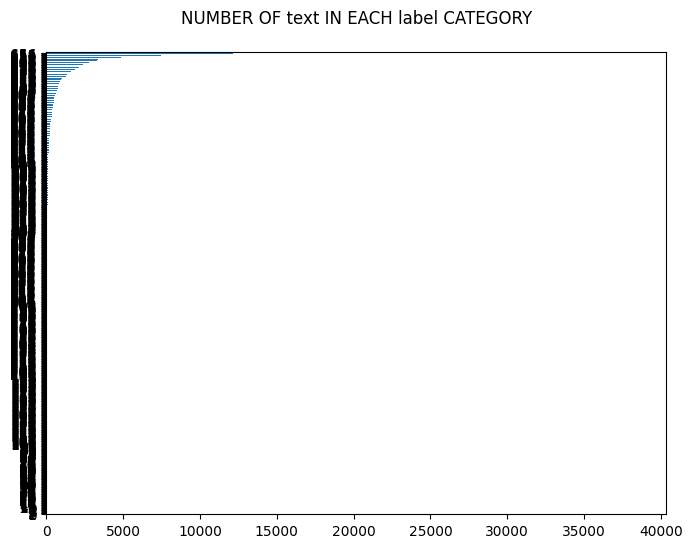

In [54]:

from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
df['target'] = le.fit_transform(df['label'])
 
fig = plt.figure(figsize=(8,6)) 
df.groupby('label').text.count().sort_values().plot.barh(
    ylim=0,   title= 'NUMBER OF text IN EACH label CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);
 
numlabel = df['target'].nunique()
numlabel


In [35]:
df.columns

Index(['text', 'label', 'split', 'target'], dtype='object')

In [36]:
label_counts = df['label'].value_counts()
print(label_counts)

label
Birth Control                                                          38436
Depression                                                             12164
Pain                                                                    8245
Anxiety                                                                 7812
Acne                                                                    7435
                                                                       ...  
actor IX Deficiency                                                        4
Esophageal Variceal Hemorrhage Prophylaxis                                 4
Liver Magnetic Resonance Imaging                                           4
Prosthetic Heart Valves, Mechanical Valves - Thrombosis Prophylaxis        4
llicle Stimulation                                                         4
Name: count, Length: 657, dtype: int64


In [59]:

# top_100_labels = label_counts.index[:200]
# print(top_100_labels)


Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD',
       ...
       'Hypertriglyceridemia',
       'Vitamin/Mineral Supplementation during Pregnancy/Lactation',
       'Sexual Dysfunction, SSRI Induced', 'Psychosis', 'Menorrhagia',
       'Hypersomnia', 'Nausea/Vomiting, Chemotherapy Induced',
       'Conjunctivitis, Allergic', 'Stomach Ulce', 'Barrett's Esophagus'],
      dtype='object', name='label', length=200)


In [60]:
# Filter the DataFrame to retain only rows where 'condition' is in the top 100 frequent labels
# df_filtered = df[df['label'].isin(top_100_labels)]
 


In [61]:
# df_filtered

,text,label,split,target
1,"""My son is halfway through his fourth week of ...",ADHD,train,13
2,"""I used to take another oral contraceptive, wh...",Birth Control,train,57
3,"""This is my first time using any form of birth...",Birth Control,train,57
4,"""Suboxone has completely turned my life around...",Opiate Dependence,train,218
5,"""2nd day on 5mg started to work with rock hard...",Benign Prostatic Hyperplasia,train,54
...,...,...,...,...
215057,"""I started taking Apri about 7 months ago. My ...",Birth Control,test,57
215059,"""I&#039;ve been taking Lexapro (escitaploprgra...",Anxiety,test,35
215060,"""I&#039;m married, 34 years old and I have no ...",Birth Control,test,57
215061,"""I was prescribed Nucynta for severe neck/shou...",Pain,test,229


In [62]:
# df = df_filtered

In [37]:
numlabel = df['target'].nunique()
numlabel


657

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = "cuda"  # the device to load the model onto

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(modelpath)
model = AutoModelForSequenceClassification.from_pretrained(modelpath, num_labels=numlabel)

# Move the model to the specified device
model.to(device)

/home/bhairavi/om/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/bhairavi/om/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint 

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine

In [23]:
# df['token_length'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# # Calculate the maximum token length
# max_length = df['token_length'].max()

# # Calculate the next maximum token length
# next_max_token_length = df['token_length'].nlargest(2).iloc[1]

# # Calculate the average token length
# average_token_length = df['token_length'].mean()

# # Display the results
# print(f"Maximum token length: {max_length}")
# print(f"Next maximum token length: {next_max_token_length}")
# print(f"Average token length: {average_token_length:.2f}")

In [24]:
train_df = df[df['split'] == 'train'].drop(columns=['split'])

test_df = df[df['split'] == 'test'].drop(columns=['split'])
 

In [25]:

# %%
from sklearn.model_selection import StratifiedShuffleSplit

# Splitting off the test set with 5% of the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=42)  # 5% for test
for train_val_idx, test_idx in sss.split(df, df['target']):
    train_val_df = df.iloc[train_val_idx]
    test_df = df.iloc[test_idx]

# Further split train_val_df into train and validation sets with validation set being 15.79% of the remaining data
# (which is equivalent to 15% of the original dataset size)
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)  # ~15.79% of remaining data
for train_idx, val_idx in sss_val.split(train_val_df, train_val_df['target']):
    train_df = train_val_df.iloc[train_idx]
    val_df = train_val_df.iloc[val_idx]
 

def tokenize_and_format(examples):
    # Tokenize the texts
    tokenized_inputs = tokenizer(examples['text'], padding="max_length", truncation=True, max_length=max_length)
    tokenized_inputs['label'] = list(map(int, examples['target']))
    return tokenized_inputs

# Convert pandas DataFrame to Hugging Face's Dataset
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(val_df) 
test_dataset = Dataset.from_pandas(test_df)

# Map the tokenization function across the datasets
train_dataset = train_dataset.map(tokenize_and_format, batched=True,batch_size=16)
eval_dataset = eval_dataset.map(tokenize_and_format, batched=True,batch_size=16) 
test_dataset = test_dataset.map(tokenize_and_format, batched=True,batch_size=16)




Map: 100%|██████████| 10504/10504 [00:04<00:00, 2482.00 examples/s]


In [26]:


# %%
from sklearn.metrics import f1_score, precision_score, recall_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    return {
        'eval_f1': f1,
        'eval_precision': precision,
        'eval_recall': recall,
    }

 


# %%

# %%
 

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Use 'epoch' to evaluate at the end of each epoch
    save_strategy="epoch",  # Also use 'epoch' to save at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,  # Load the best model at the end of training based on metric
    metric_for_best_model='f1',  # Define the metric for evaluating the best model
    logging_dir='./logs',
    logging_steps=10,
    report_to=[] 
)


 

trainer = Trainer(
    model=model,
    args=training_args ,  # Here you will need to make sure that the Trainer is set up correctly
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

# Start training
trainer.train()

 
 



/home/bhairavi/om/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
save_directory = saveDIR
 

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer (optional, but recommended)
tokenizer.save_pretrained(save_directory)

('/home/bhairavi/om/om5/s2d/debertaV3_s2d/tokenizer_config.json',
 '/home/bhairavi/om/om5/s2d/debertaV3_s2d/special_tokens_map.json',
 '/home/bhairavi/om/om5/s2d/debertaV3_s2d/spm.model',
 '/home/bhairavi/om/om5/s2d/debertaV3_s2d/added_tokens.json',
 '/home/bhairavi/om/om5/s2d/debertaV3_s2d/tokenizer.json')

In [ ]:

# %%
from colorama import Fore, Style


# %% [markdown]
# eval dataset performance so that keywords_classes can be fixed

# %%
results = trainer.evaluate()

# Predict using the trained model to get labels and predictions
predictions, labels, _ = trainer.predict(eval_dataset)
predictions = np.argmax(predictions, axis=1)


# %%
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(
    labels,
    predictions,
    target_names=df['label'].unique() , # Adjust this line as per your dataset
    digits=4
)
print(Fore.CYAN,"keywords class evaluation detection RESULTS")
print(report)


# %% [markdown]
# skyline

# %%


 keywords class evaluation detection RESULTS
                                 precision    recall  f1-score   support

                      Psoriasis     1.0000    1.0000    1.0000         7
                 Varicose Veins     1.0000    1.0000    1.0000         7
                        Typhoid     1.0000    0.8750    0.9333         8
                    Chicken pox     1.0000    1.0000    1.0000         7
                       Impetigo     0.8750    1.0000    0.9333         7
                         Dengue     0.7000    1.0000    0.8235         7
               Fungal infection     1.0000    0.7143    0.8333         7
                    Common Cold     1.0000    1.0000    1.0000         7
                      Pneumonia     1.0000    1.0000    1.0000         7
          Dimorphic Hemorrhoids     0.8750    1.0000    0.9333         7
                      Arthritis     1.0000    1.0000    1.0000         7
                           Acne     1.0000    1.0000    1.0000         7
     

In [ ]:


# %%
print(Fore.RED +"TEST DATA IS OUR SKYLINE RESULT")
 
results = trainer.evaluate()

# Predict using the trained model to get labels and predictions
predictions, labels, _ = trainer.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)


# %%
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(
    labels,
    predictions,
    target_names=df['label'].unique() , # Adjust this line as per your dataset
    digits=4
)

print(report)


TEST DATA IS OUR SKYLINE RESULT
                                 precision    recall  f1-score   support

                      Psoriasis     1.0000    1.0000    1.0000         2
                 Varicose Veins     1.0000    1.0000    1.0000         2
                        Typhoid     1.0000    1.0000    1.0000         2
                    Chicken pox     1.0000    1.0000    1.0000         3
                       Impetigo     1.0000    1.0000    1.0000         3
                         Dengue     1.0000    1.0000    1.0000         2
               Fungal infection     1.0000    1.0000    1.0000         3
                    Common Cold     1.0000    1.0000    1.0000         3
                      Pneumonia     1.0000    1.0000    1.0000         2
          Dimorphic Hemorrhoids     1.0000    1.0000    1.0000         2
                      Arthritis     1.0000    1.0000    1.0000         3
                           Acne     1.0000    1.0000    1.0000         2
               Bro